In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [246]:
train_df=pd.read_csv('D:\\Datascience\\datas\\titanic_train.csv')  # reading train file

In [247]:
test_df=pd.read_csv('D:\\Datascience\\datas\\titanic_test.csv')

lets do some data understanding

In [248]:
test_df.shape

(418, 11)

In [249]:
train_df.shape

(891, 12)

In [250]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [252]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [253]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [254]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5,1,'train data set missing values')

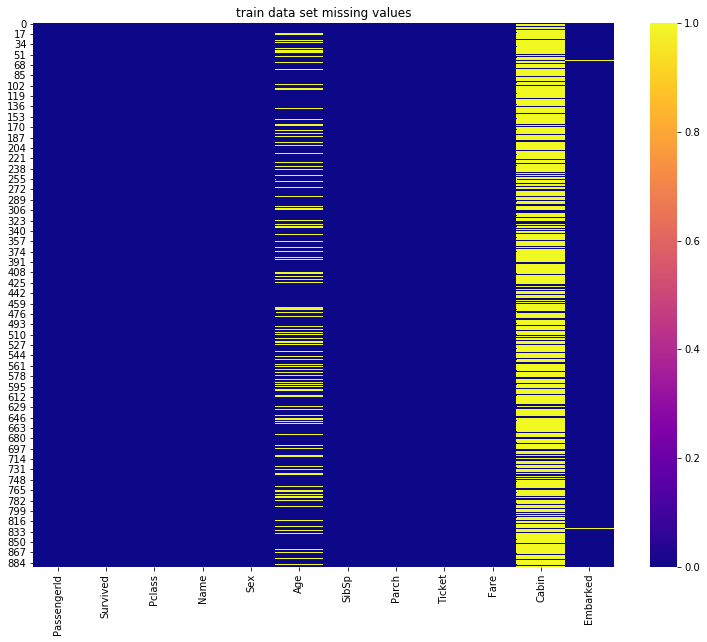

In [255]:
plt.figure(figsize=(13,10))
sns.heatmap(train_df.isnull(),xticklabels=train_df.columns,cmap='plasma')
plt.title('train data set missing values')

Text(0.5,1,'test dataset missing values')

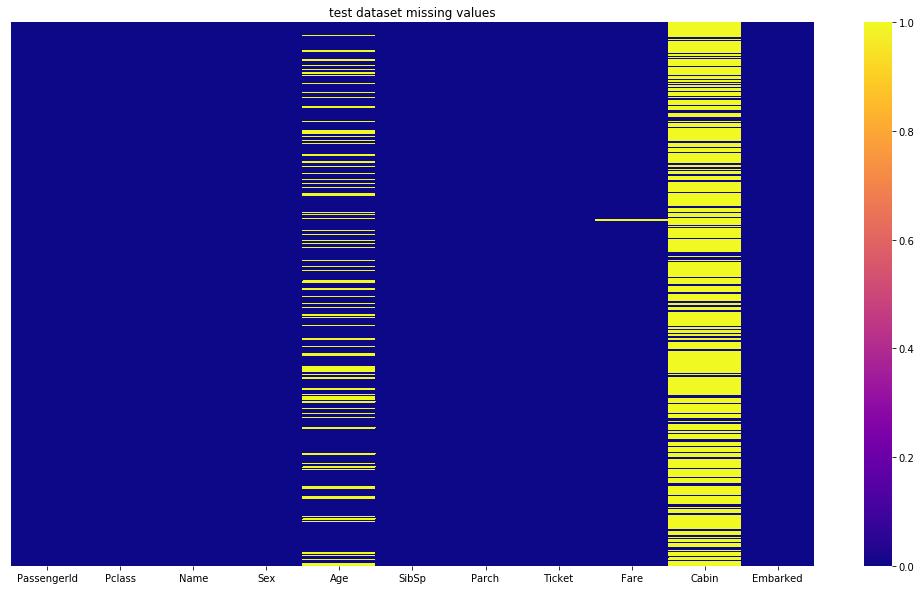

In [256]:
plt.figure(figsize=(18,10))
sns.heatmap(test_df.isnull(),yticklabels=False, xticklabels=test_df.columns, cmap='plasma')
plt.title('test dataset missing values')

We can variables like cabin and and Age has to many nan values. Since Survived is the target variable we see this bariable only in the  training data set
now lets start treating the nan values for Age and Cabin

In [257]:
train_df['Cabin'].tail()

886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, dtype: object

In [258]:
train_df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F2             3
D              3
E101           3
F33            3
B22            2
E24            2
C123           2
C124           2
B28            2
C68            2
B20            2
C125           2
D35            2
E25            2
B18            2
C92            2
F4             2
D20            2
C93            2
E8             2
C126           2
D36            2
F G73          2
C2             2
B77            2
D33            2
              ..
A10            1
D47            1
A7             1
F G63          1
B37            1
B71            1
B101           1
B94            1
B82 B84        1
E31            1
C62 C64        1
B86            1
C46            1
T              1
D21            1
C103           1
A26            1
C99            1
D19            1
C82            1
C95            1
C54            1
D37            1
B42            1
C101           1
E58            1
D15            1
E10           

dealing with Cabin Variable is tricky

In [259]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Fare']=dataset['Fare'].fillna(dataset['Fare'].mean())
    dataset['Embarked']=dataset['Embarked'].fillna(dataset['Embarked'].value_counts().index[0])

In [260]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

### Visualization 

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


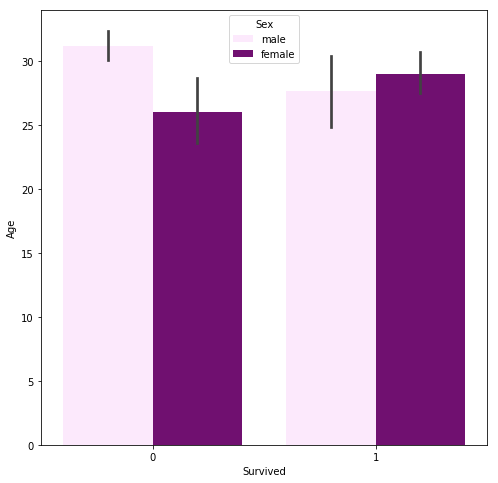

In [261]:
plt.figure(figsize=(8,8))
sns.barplot(x='Survived',y='Age',hue='Sex',data=train_df, color='purple')

We can see that the survival rate of women in higher than that of men. now lets see the distbuition of age

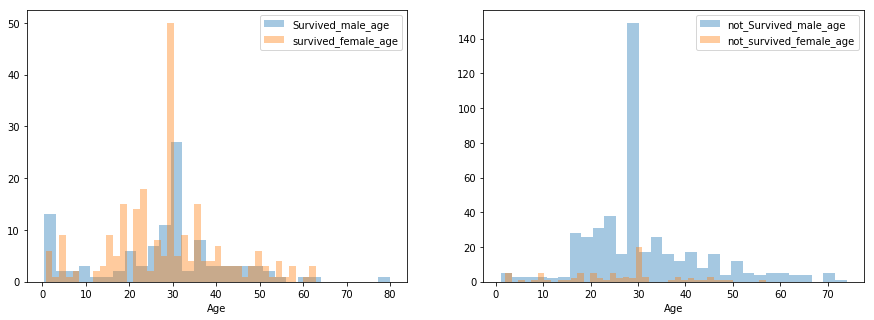

In [262]:
survived=train_df[train_df['Survived']==1]
not_survived=train_df[train_df['Survived']==0]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(survived[survived['Sex']=='male'].Age,bins=30, label='Survived_male_age',kde=False)
sns.distplot(survived[survived['Sex']=='female'].Age,bins=40,label='survived_female_age',kde=False)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(not_survived[not_survived['Sex']=='male'].Age,bins=30, label='not_Survived_male_age',kde=False)
sns.distplot(not_survived[not_survived['Sex']=='female'].Age,bins=40,label='not_survived_female_age',kde=False)
plt.legend()
plt.show()

We can clearly see that women between age group of 20 to 30 have higher chances of survival. Also babies have a higher chances of survival. men have very low chance od survival.

In [263]:
size=[survived.Sex[survived['Sex']=='male'].count(),survived.Sex[survived['Sex']=='female'].count(),not_survived.Sex[not_survived['Sex']=='male'].count(),not_survived.Sex[not_survived['Sex']=='female'].count()]

In [264]:
size

[109, 233, 468, 81]

In [265]:
labels=['Male_survived', 'Female_survived','Male_not_Survived','Female_not_survived']

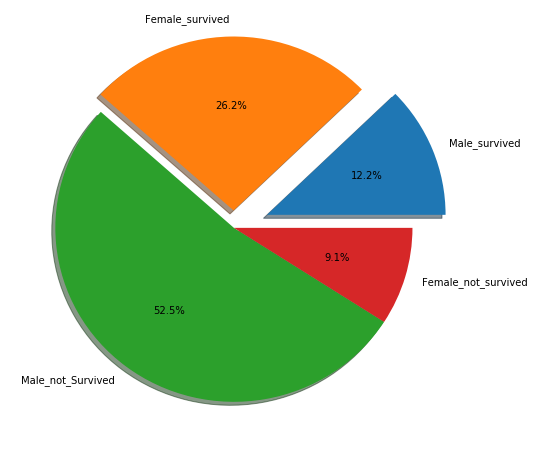

In [266]:
plt.figure(figsize=(8,8))
plt.pie(size,labels=labels,autopct='%1.1f%%',shadow=True, explode=(0.2,0.1,0,0))
plt.show()

the above pie chart explains the % of male and female survival rate 

Now lest see if there is any relatioship between PClass, Embarked and survival rate

C:\Users\Antony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Antony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

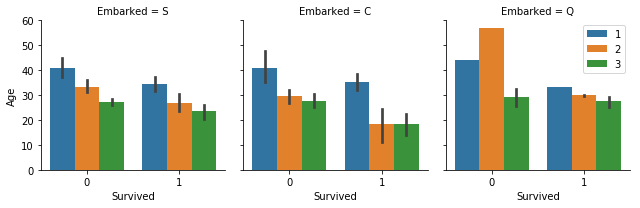

In [267]:
plt.figure(figsize=(10,10))
FacetGrid=sns.FacetGrid(train_df,col='Embarked')
FacetGrid.map(sns.barplot,'Survived','Age','Pclass', palette=colour)
plt.legend()
plt.show()

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


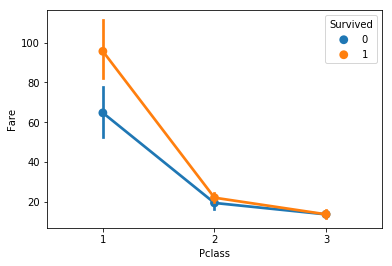

In [268]:
sns.pointplot(train_df['Pclass'],train_df['Fare'],train_df['Survived'])

a section of Pclass=1, with Fare range higher than 80 had higher survival chances. 

In [269]:
dataset=[train_df,test_df]
for data in dataset:
    data['Relatives']=data['Parch']+data['SibSp']
    data.loc[data['Relatives']==0,'Alone']=1
    data.loc[data['Relatives']>0,'Alone']=0
    data['Alone']=data['Alone'].astype('category')

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


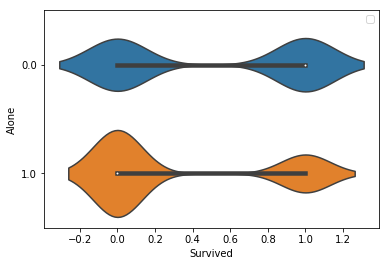

In [270]:
sns.violinplot(x=train_df['Survived'],y=train_df['Alone'], palette=colour)
plt.legend()

from the above plot we can infer that the chances of survival when you are not alone, and chances of not surviving when you are alone are high. 

C:\Users\Antony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


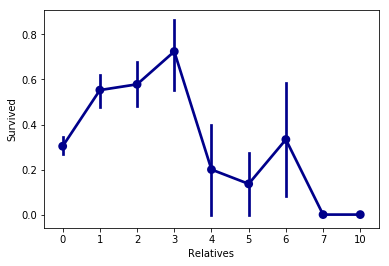

In [271]:
sns.pointplot(x=train_df['Relatives'], y=train_df['Survived'], color='DarkBlue')

The Survival chance of family with less that 3 has higher chances of survival, As the family size increases... the survival chances decreases

#### Data Preprocessing

In [272]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [273]:
le=LabelEncoder()

In [274]:
#for col in train_df[['Sex','Embarked']]:
    #train_df[col]=le.fit_transform(train_df[col].astype('str'))

In [275]:
#for col in test_df[['Sex','Embarked']]:
    #test_df[col]=le.fit_transform(test_df[col].astype('str'))

In [276]:
dataset=[train_df,test_df]
for data in dataset:
    for col in data[['Sex','Embarked']]:
        data[col]=le.fit_transform(data[col].astype('str'))      #Label Encoding for Sex and Embarked Variables

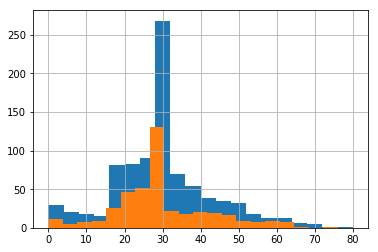

In [277]:
dataset=[train_df,test_df]                        #Lets see the distribution of Age.
for data in dataset:
    data['Age']=data['Age'].astype('int64')
    data['Age'].hist(bins=20)

In [278]:
for data in dataset:
    data.loc[data['Age']<=10,'Age']=0
    data.loc[(data['Age']>10) & (data['Age']<=20),'Age']=1
    data.loc[(data['Age']>20) & (data['Age']<=25),'Age']=2
    data.loc[(data['Age']>25) & (data['Age']<=28),'Age']=3
    data.loc[(data['Age']>28) & (data['Age']<=30),'Age']=4
    data.loc[(data['Age']>30) & (data['Age']<=45),'Age']=5
    data.loc[(data['Age']>45),'Age']=6
# Binning age Variables and converting it into categorical

In [279]:
train_df['Age'].value_counts()

4    224
5    202
2    121
1    116
6    101
0     64
3     63
Name: Age, dtype: int64

In [280]:
test_df['Age'].value_counts()

4    111
5     80
2     73
6     52
1     47
3     33
0     22
Name: Age, dtype: int64

In [281]:
dataset=[train_df,test_df]
for data in dataset:
    nul_values=data['Cabin'].isnull().sum()
    total=data['Cabin'].isnull().count()
    percent_nul=(nul_values/total)*100


In [282]:
print('Total no. of null values in Cabin Variable', nul_values)
print ('missing value in %')
print(percent_nul)

Total no. of null values in Cabin Variable 327
missing value in %
78.22966507177034


practically speaking, the serial no of the ticket, name of a person doesnot contribute to survival of any individual, also the Cabin Varible has 78% of missing information so we choose to drop the three variable

In [283]:
train_df=train_df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)
test_df=test_df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [284]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Relatives    0
Alone        0
dtype: int64

In [285]:
#dataset=[train_df,test_df]
#for data in dataset:
    #fare_array=data['Fare'].values.astype(float)
    #numeric=MinMaxScaler().fit_transform(fare_array)
    #data['Fare']=numeric

In [286]:
train_df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

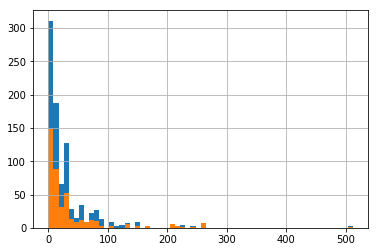

In [287]:
dataset=[train_df,test_df]
for data in dataset:
    data['Fare']=data['Fare'].astype('int64')
    data['Fare'].hist(bins=60, range=(data['Fare'].min(),data['Fare'].max()))

In [288]:
for data in dataset:
    data.loc[data['Fare']<=7,'Fare']=0
    data.loc[(data['Fare']>7) & (data['Fare']<8),'Fare']=1
    data.loc[(data['Fare']>=8) & (data['Fare']<=12),'Fare']=2
    data.loc[(data['Fare']>12) & (data['Fare']<=25),'Fare']=3
    data.loc[(data['Fare']>25) & (data['Fare']<=50),'Fare']=4
    data.loc[(data['Fare']>50),'Fare']=5     # Converting Fare variable into categorical by binning the values

In [289]:
data=data['Fare'].astype('category')

In [290]:
train_df['Fare'].value_counts()

0    241
3    179
4    167
5    159
2    145
Name: Fare, dtype: int64

In [291]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone
0,3,1,5,0,0,0,1,0,1.0
1,3,0,6,1,0,0,2,1,0.0
2,2,1,6,0,0,2,1,0,1.0
3,3,1,3,0,0,2,2,0,1.0
4,3,0,2,1,1,2,2,2,0.0


In [292]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone
0,0,3,1,2,1,0,0,2,1,0.0
1,1,1,0,5,1,0,5,0,1,0.0
2,1,3,0,3,0,0,0,2,0,1.0
3,1,1,0,5,1,0,5,2,1,0.0
4,0,3,1,5,0,0,2,2,0,1.0


Lets do one last visualization: Age group with respect to survival

In [293]:
sur_age=pd.crosstab(train_df['Age'],train_df['Survived'])
sur_age

Survived,0,1
Age,,
0,26,38
1,72,44
2,79,42
3,39,24
4,154,70
5,116,86
6,63,38


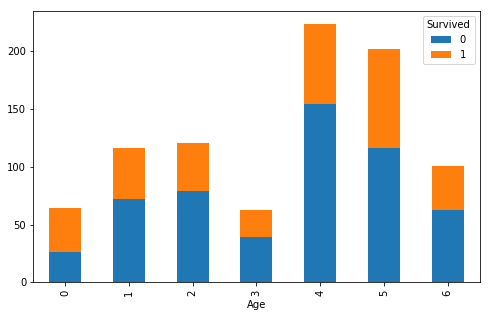

In [294]:
sur_age.plot(kind='bar', stacked=True, figsize=(8,5))
plt.show()

#### Model fitting

Logistic Regression

In [300]:
x=train_df.drop('Survived', axis=1)   #Independent variables assigned to x

In [302]:
y=train_df['Survived']   #target variable assigned to y

In [296]:
from sklearn.linear_model import LogisticRegression

In [298]:
le=LogisticRegression()

In [310]:
logit=le.fit(x,y)
ypred_log=le.predict(test_df)
logi_acc=round(le.score(x,y)*100,2)
print('Accuracy score of Logistic Regression:')
logi_acc

Accuracy score of Logistic Regression:


80.25

Decision Tree

In [311]:
from sklearn.tree import DecisionTreeClassifier

In [312]:
DT=DecisionTreeClassifier()

In [313]:
tree=DT.fit(x,y)
ypred_tree=tree.predict(test_df)
tree_acc=round(tree.score(x,y)*100,2)
print('Accuracy score of Decision Tree model:')
tree_acc

Accuracy score of Decision Tree model:


90.35

KNN-Classifier

In [315]:
from sklearn.neighbors import KNeighborsClassifier

In [319]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [320]:
kneighbour=KNN.fit(x,y)
ypred_knn=KNN.predict(test_df)
knn_acc=round(KNN.score(x,y)*100,2)
print('Accuracy score of K Nearest Neighboure model')
knn_acc

Accuracy score of K Nearest Neighboure model


84.85

Random Forest Classifier

In [321]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Antony\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [327]:
rand=RandomForestClassifier(n_estimators=100)

In [328]:
forest=rand.fit(x,y)
ypred_forest=forest.predict(test_df)
forest_acc=round(forest.score(x,y)*100,2)
print('Accuracy score of Random Forest model')
forest_acc

Accuracy score of Random Forest model


90.35